# FIAP - Atividade F3A4 - Grupo 61

> Esse projeto é parte do curso de **Inteligência Artificial** da [FIAP](https://github.com/fiap) - Online 2024. Este notebook é a atividade "**Fase 3** Atividade Cap. 14 - A primeira técnica de aprendizado de máquina."

## Objetivos

1. Desenvolver análise exploratória dos dados
2. Desenvolver análise descritiva dos dados
3. Responder ao seguinte questionamento: `Encontrar o “perfil ideal” de solo/clima para as plantações, além de discorrer sobre como os três produtos distintos (à escolha do grupo) se comparam com esse perfil ideal. Por exemplo, preferem maior umidade e mais precipitação? Preferem mais calor e menos fósforo? Para esta parte se apoie em análises estatísticas e/ou visuais;`
4. Desenvolver modelos preditivos de classificação para os dados

## Integrantes

- Bruno Conterato (RM561048)
- Luis Emidio (RM559976)
- Willian Pinheiro Marques (RM560402)
- Roberto Besser (RM559400)
- Ludimila Vitorino (RM559697)

## Professores

- Tutor: <a href="https://www.linkedin.com/in/lucas-gomes-moreira-15a8452a/">Lucas Gomes Moreira</a>
- Coordenador: <a href="https://www.linkedin.com/in/profandregodoi/">André Godoi</a>

## Definição do Problema

## Preparação do Ambiente

In [1]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Set the dark theme for plots
plt.style.use('dark_background')

In [3]:
# Dangerously set warnings off (Just for better visualization)
import warnings
warnings.filterwarnings('ignore')

## Coleta de Dados

In [4]:
# Load dataset

df = pd.read_csv('./data/dataset.csv')
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
1437,120,8,46,29.556575,90.709373,6.732834,28.365356,muskmelon
1246,4,134,200,28.578288,80.956290,5.840256,73.342321,grapes
1355,110,28,46,24.291050,88.045413,6.498896,51.260464,watermelon
49,88,55,45,24.635449,80.413630,7.730368,253.720278,rice
266,44,59,78,20.675265,19.853890,7.599033,84.783440,chickpea



## 1. Análise Exploratória de Dados

### 1.2. Compreensão dos dados

#### 1.2.1. Visualização em tabela dos dados

In [5]:
print("Quantidade de linhas: ", df.shape[0])
print("Quantidade de colunas: ", df.shape[1])

# Display 5 random samples from the dataset
df.sample(5)

Quantidade de linhas:  2200
Quantidade de colunas:  8


,N,P,K,temperature,humidity,ph,rainfall,label
1557,30,127,204,22.500503,92.458783,6.126437,100.934390,apple
1470,115,12,52,27.514922,94.962187,6.685553,21.017964,muskmelon
1578,14,139,197,21.724845,92.839756,6.056530,121.696176,apple
583,29,41,21,31.493981,62.849169,8.869797,64.568076,mothbeans
312,28,80,17,19.622078,18.671709,5.809420,144.156745,kidneybeans


#### 1.2.2. Entendendo os dados

**Variáveis numéricas discretas**
- N: concentração de potássio (unidade não informada)
- P: concentração de fósforo (unidade não informada)
- K: concentração de potássio (unidade não informada)

**Variáveis numéricas contínuas**
- temperature: temperatura (ºC)
- humidity: umidade (%)
- ph: H do solo
- rainfall: quantidade de precipitação (mm)

**Variaveis categóricas**
- label: cultura agrícola


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### 1.2.3. Visualizando as classes (Culturas agrícolas) 

- Culturas agrícolas disponíveis:
  - rice (arroz)
  - maize (milho)
  - chickpea (grão-de-bico)
  - kidneybeans (feijão)
  - pigeonpeas (ervilhas)
  - mothbeans (feijão-moth)
  - mungbean (feijão-mungo)
  - blackgram (feijão-preto)
  - lentil (lentilha)
  - pomegranate (romã)
  - banana (banana)
  - mango (manga)
  - grapes (uvas)
  - watermelon (melancia)
  - muskmelon (melão)
  - apple (maçã)
  - orange (laranja)
  - papaya (papaia)
  - coconut (coco)
  - cotton (algodão)
  - jute (juta)
  - coffee (café)
- Total de culturas agrícolas: 22
- Cada cultura agrícola possui 100 registros
- Total de registros: 2200

In [7]:
# Contagem dos valores para cada classe
classes = df['label'].value_counts()
classes


label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

#### 1.2.4. Análise de Inconsistências

**Investigação de outliers**

- Cada cultura agrícola é cultivada em diferentes condições de solo, temperatura, umidade, pH e precipitação
- Portanto, não faz sentido considerar outliers nos dados entre culturas diferentes
- A análise de outliers deve, portanto, ser feita para cada cultura agrícola individualmente

**Método de detecção de outliers**

Vamos utilizar o método do z_score para detectar outliers.

Cálculo do z_score:

`z = (X - μ) / σ`
- X é o valor da amostra
- μ é a média da população
- σ é o desvio padrão da população

O z_score é uma medida de quantos desvios padrão um ponto de dados está longe da média. Se o z_score de um ponto de dados for maior que 2, consideramos o ponto como um outlier.

Consideremos a população como sendo dados de cada coluna para cada cultura agrícola.

**Outlivers encontrados**
- Apenas 2 pontos outliers encontrados: para a cultura agrícola 'apple' (maçã) na variável 'ph'
  
**Conclusão**
- Os dados não contém quantidade significativa de outliers, sendo assim não foi necessário a correção de inconsistências.
- Remoção de duplicatas são não-aplicáveis

In [8]:
feature_columns = df.select_dtypes(include=[float, int]).columns
for crop in df['label'].unique():
    print(f"Outliers para a classe {crop}")
    z_scores = df[df['label'] == crop][feature_columns].apply(zscore)
    outliers = (z_scores.abs() > 2).sum()
    
    if len(outliers[outliers > 0]) == 0:
        print("Nenhum outlier encontrado")
        print("\n")
        continue
    
    print(outliers[outliers > 0])
    print("\n")


Outliers para a classe rice
Nenhum outlier encontrado


Outliers para a classe maize
Nenhum outlier encontrado


Outliers para a classe chickpea
Nenhum outlier encontrado


Outliers para a classe kidneybeans
Nenhum outlier encontrado


Outliers para a classe pigeonpeas
Nenhum outlier encontrado


Outliers para a classe mothbeans
Nenhum outlier encontrado


Outliers para a classe mungbean
Nenhum outlier encontrado


Outliers para a classe blackgram
Nenhum outlier encontrado


Outliers para a classe lentil
Nenhum outlier encontrado


Outliers para a classe pomegranate
Nenhum outlier encontrado


Outliers para a classe banana
Nenhum outlier encontrado


Outliers para a classe mango
Nenhum outlier encontrado


Outliers para a classe grapes
Nenhum outlier encontrado


Outliers para a classe watermelon
Nenhum outlier encontrado


Outliers para a classe muskmelon
Nenhum outlier encontrado


Outliers para a classe apple
ph    2
dtype: int64


Outliers para a classe orange
Nenhum outlier encont

**Investigando os outliers encontrados**

**Objetivo**: Vamos mostrar que os 2 outliers encontrados para a cultura agrícola 'apple' (maçã) na variável 'ph' são valores coerentes.

O print abaixo mostra os valores de 'ph' com maiores z_scores (em valores absolutos) em ordem decrescente.

Portanto, os 2 primeiros elementos são os outliers.

Percebemos que o pH deles, cujos valores são 6.499 e 6.496, são valores coerentes para a cultura agrícola 'apple' (maçã).

Portanto, não precisamos remover esses valores dos dados

In [9]:
# Filter z-scores for 'apple' crop
apple_z_scores = df[df['label'] == 'apple'][feature_columns].apply(zscore)

# Find outliers in 'ph' variable
apple_ph_outliers = apple_z_scores[apple_z_scores['ph'].abs() > 2]
# Print the top 10 absolute z-scores for 'apple' crop
top_10_z_scores_indices = apple_z_scores['ph'].abs().sort_values(ascending=False).head(10).index

print("Top 10 absolute z-scores for 'apple' crop with their 'ph' values:")
for idx in top_10_z_scores_indices:
    print(f"Index: {idx}, z_score: {apple_z_scores.loc[idx, 'ph']}, ph value: {df.loc[idx, 'ph']}")

Top 10 absolute z-scores for 'apple' crop with their 'ph' values:
Index: 1508, z_score: 2.128546006234152, ph value: 6.4992268210000015
Index: 1598, z_score: 2.1199792276329554, ph value: 6.496934492
Index: 1537, z_score: 1.919848914297802, ph value: 6.443382913
Index: 1539, z_score: 1.9157618954418458, ph value: 6.442289294
Index: 1558, z_score: 1.7832022651250432, ph value: 6.406818518
Index: 1597, z_score: 1.758920854382436, ph value: 6.400321212000001
Index: 1533, z_score: 1.7054803936806822, ph value: 6.386021424
Index: 1512, z_score: 1.6948625771617147, ph value: 6.3831802710000005
Index: 1570, z_score: 1.630555248753511, ph value: 6.365972687999999
Index: 1573, z_score: -1.5524489277368383, ph value: 5.514253142


#### 1.2.5. Buscando correlações entre as variáveis

- Em termos gerais, as correlações entre as variáveis são baixas (valores absolutos menores que 23.14%)
- A excessão: a correlação entre as variáveis N e K é de 73.62%, considerada elevada.


In [10]:
# Correlation table
corr_df = df.corr(numeric_only=True)
corr_df

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


#### 1.2.6. Estatísticas descritivas básicas das variáveis numéricas

In [11]:
# Summary statistics of the dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### 1.2.7. Análise de valores nulos

Não há valores nulos nos dados

In [12]:
# Contar valores nulos por coluna
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## 2. Análise descritiva

### 2.1. Gráficos boxplot de cada variável por cultura agrícola

#### 2.1.1. Boxplot Nitrogênio (N) por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de concentração de nitrogênio (N) ideal para cada cultura agrícola. 

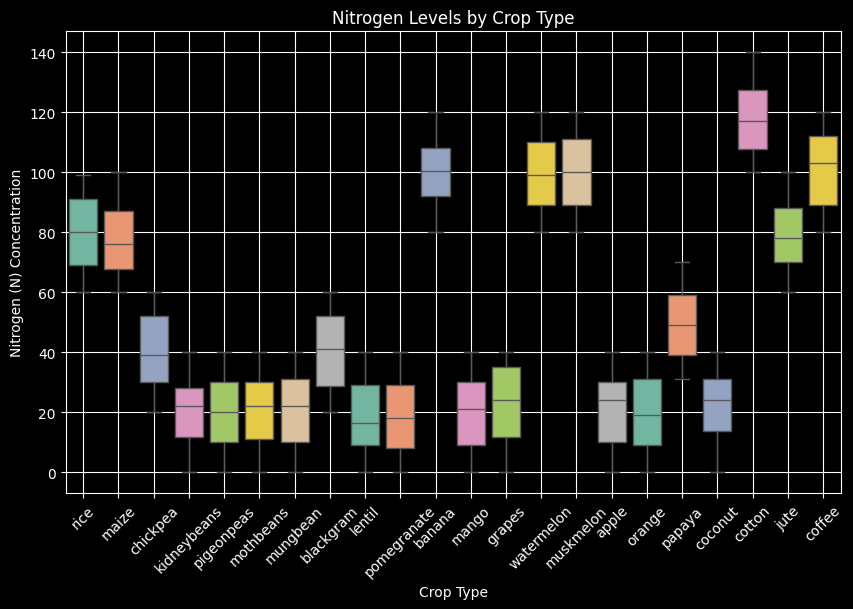

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='N', palette='Set2', legend=False)
plt.title('Nitrogen Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Nitrogen (N) Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 2.1.2. Boxplot Fósforo (P) por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de concentração de fósforo (P) ideal para cada cultura agrícola. 

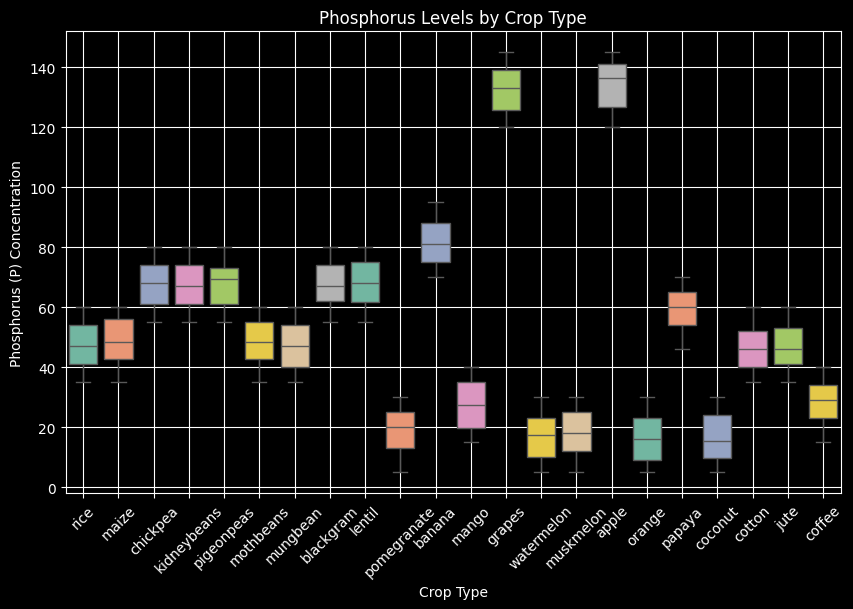

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='P', palette='Set2')
plt.title('Phosphorus Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Phosphorus (P) Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 2.1.3. Boxplot Potássio (K) por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de concentração de potássio (K) ideal para cada cultura agrícola. 

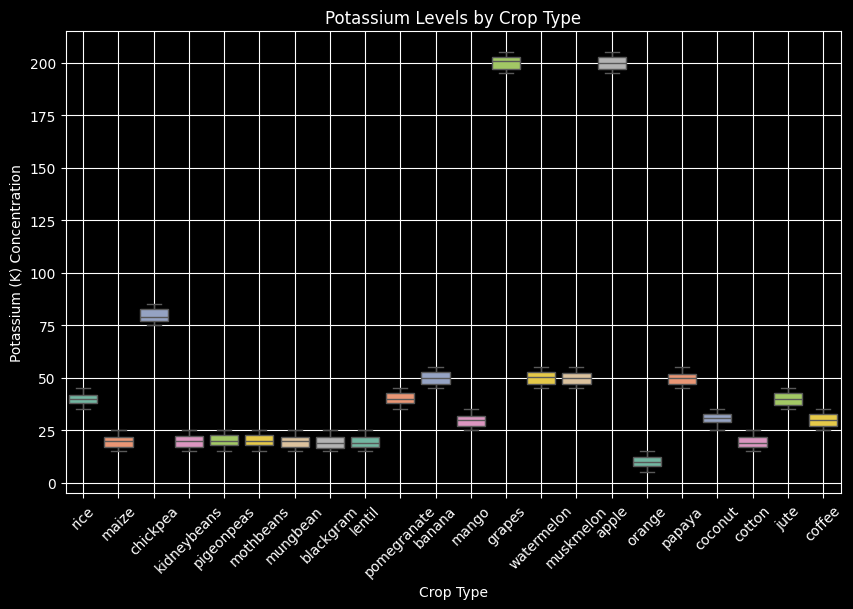

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='K', palette='Set2')
plt.title('Potassium Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Potassium (K) Concentration')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 2.1.4. Boxplot Temperatura por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de temperatura ideal para cada cultura agrícola. 

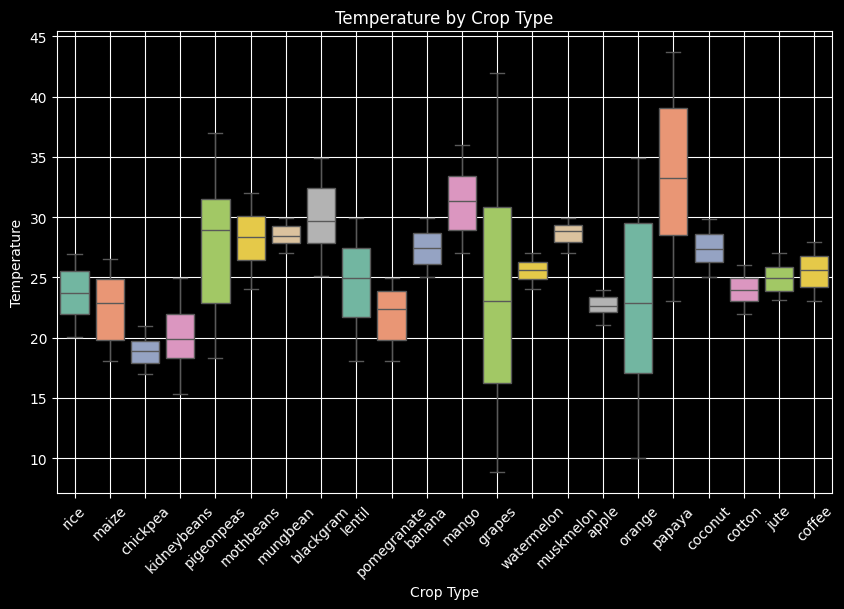

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='temperature', palette='Set2')
plt.title('Temperature by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 2.1.5. Boxplot Umidade (%) por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de umidade (%) ideal para cada cultura agrícola. 

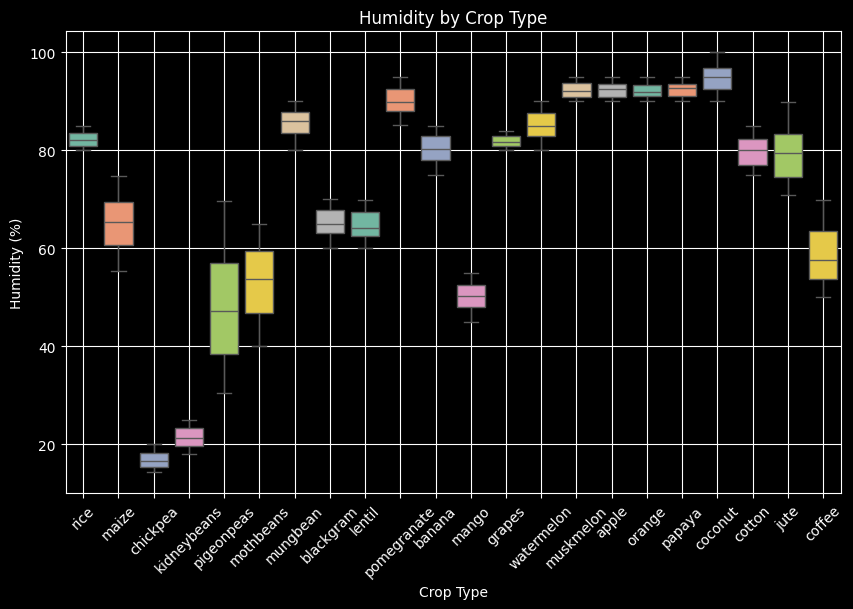

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='humidity', palette='Set2')
plt.title('Humidity by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 2.1.6. Boxplot pH por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de pH ideal para cada cultura agrícola. 

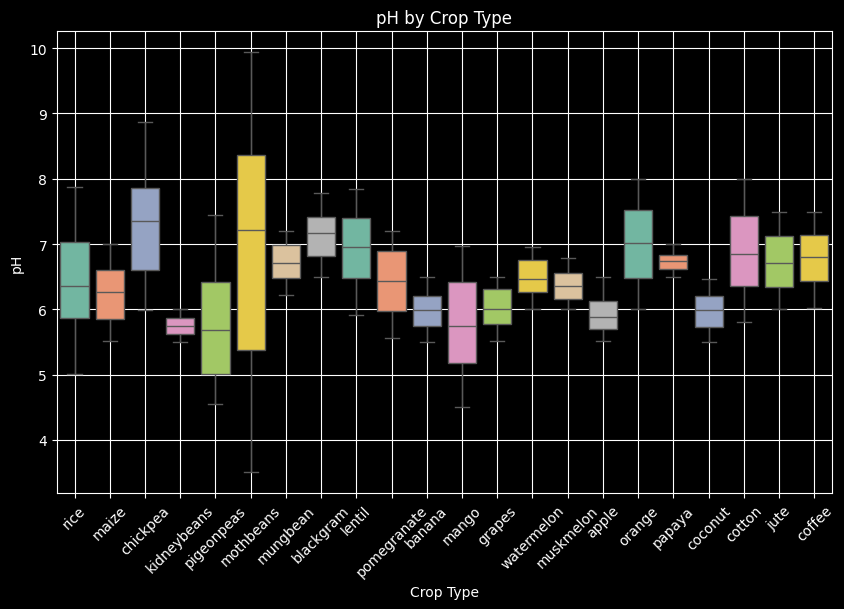

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='ph', palette='Set2')
plt.title('pH by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 2.1.7. Boxplot quantidade de precipitação por cultura agrícola

Por meio desta visualização conseguimos avaliar o intervalo de quantidade de precipitação ideal para cada cultura agrícola. 

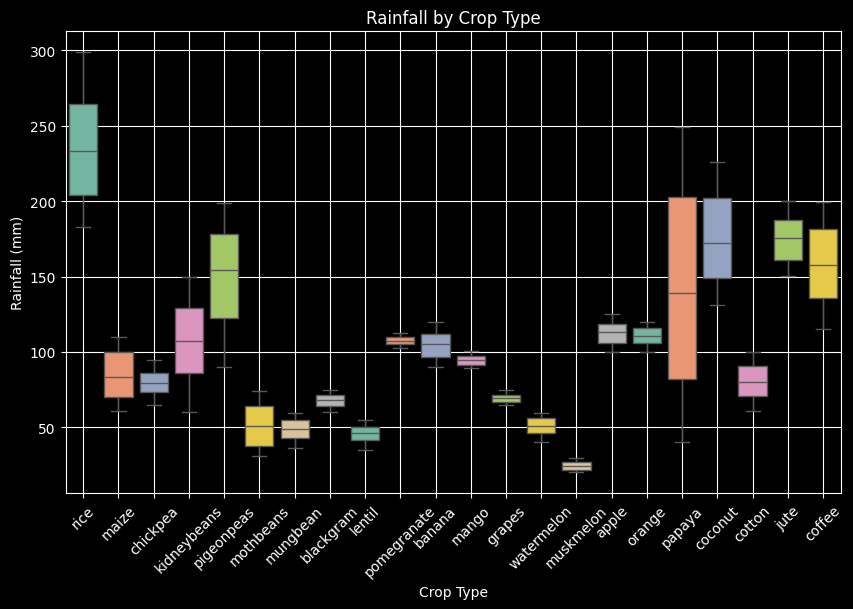

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='rainfall', palette='Set2')
plt.title('Rainfall by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### 2.2. Gráficos de barras para média de temperatura e umidade por cultura agrícola

#### 2.2.1. Média de temperatura por cultura agrícola

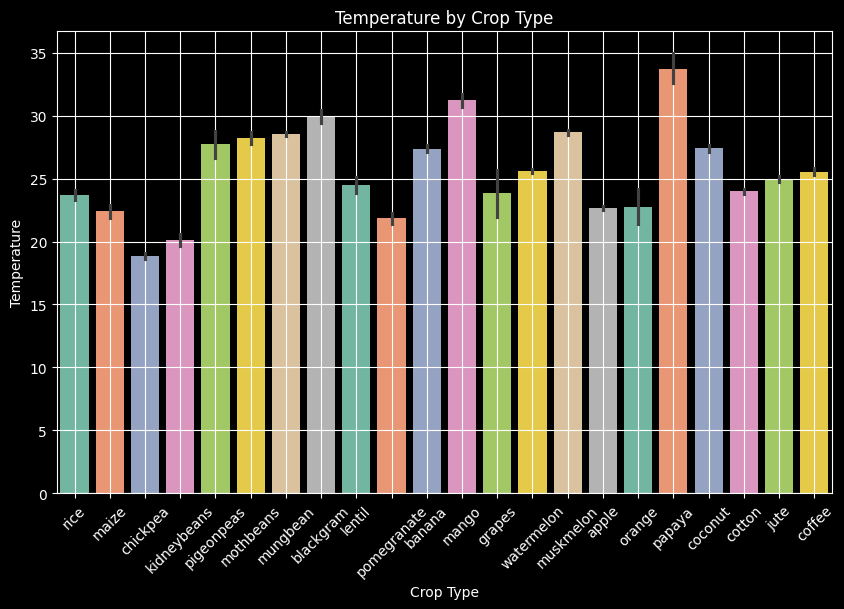

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='temperature', palette='Set2')
plt.title('Temperature by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### 2.2.2. Média de umidade por cultura agrícola

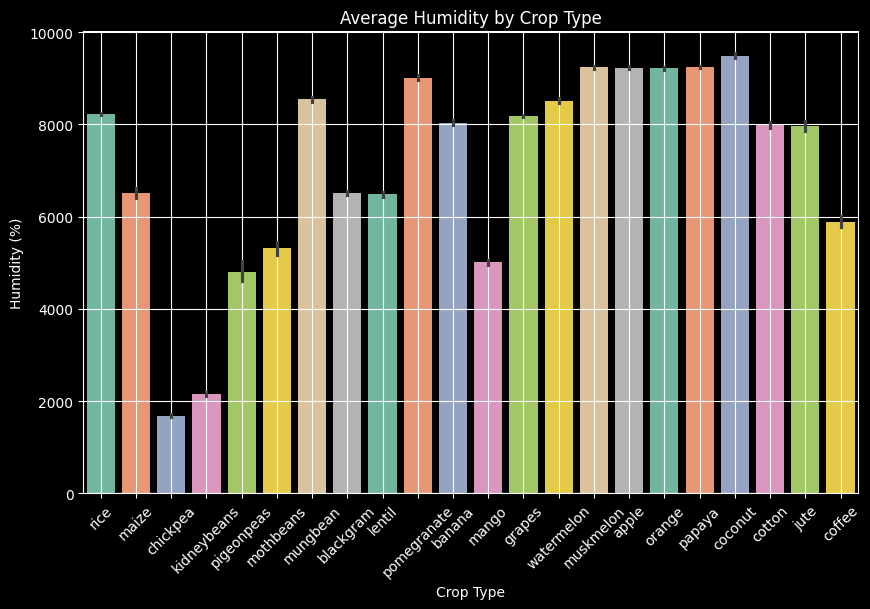

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='humidity', palette='Set2', estimator=sum)
plt.title('Average Humidity by Crop Type')
plt.xticks(rotation=45)
plt.xlabel('Crop Type')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

#### 2.2.3. Média de precipitação por cultura agrícola

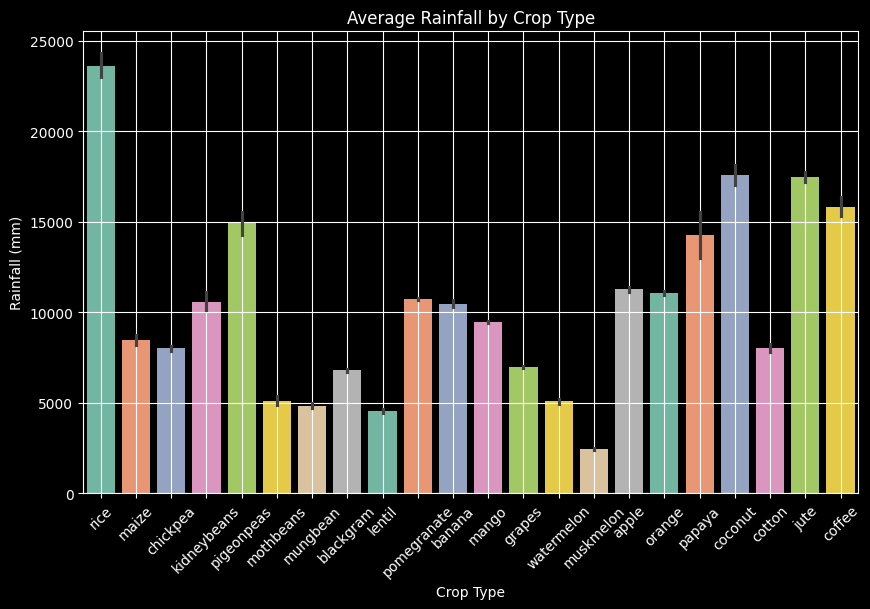

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='rainfall', palette='Set2', estimator=sum)
plt.title('Average Rainfall by Crop Type')
plt.xticks(rotation=45)
plt.xlabel('Crop Type')
plt.ylabel('Rainfall (mm)')
plt.grid()
plt.show()

### 2.3. Gráficos de barras para média de quantidade de precipitação por cultura agrícola

A linha ciano representa a estimativa da Função de Densidade de Probabilidade (PDF) da quantidade de precipitação para cada cultura agrícola.

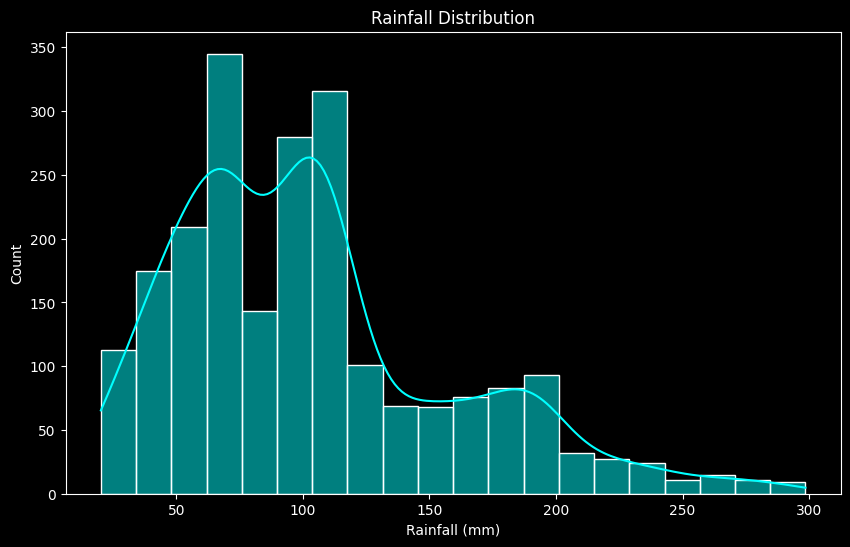

In [23]:
# 2.3. Rainfall distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rainfall'], bins=20, kde=True, color='cyan')
plt.title('Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.show()

### 2.4. Matriz de correlação entre as variáveis numéricas

Escala de cores baseada em calor:
- Azul indica menor correlação (em valores absolutos)
- Vermelho indica maior a correlação (em valores absolutos)

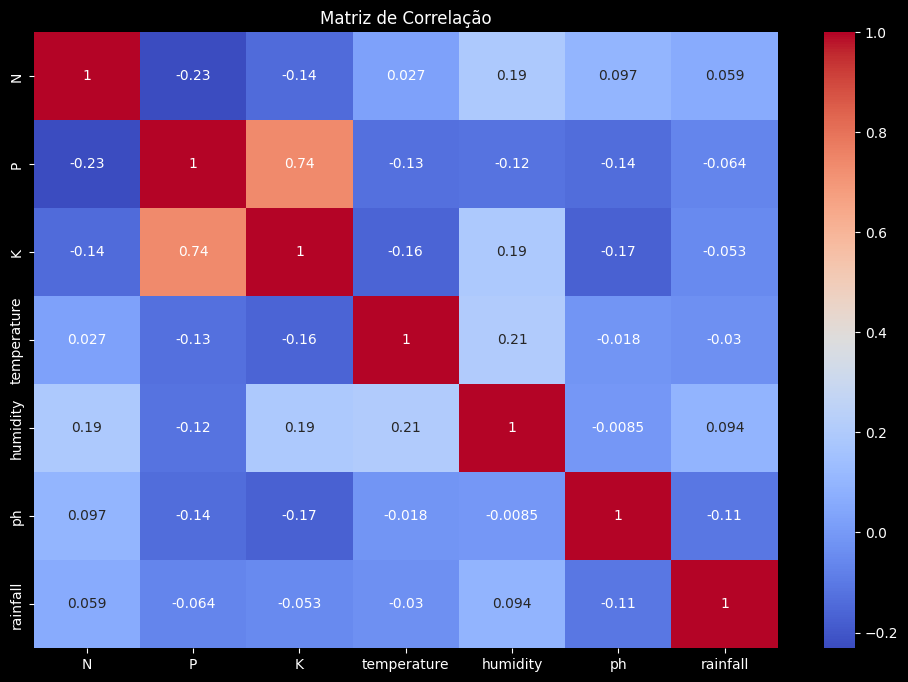

In [24]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

### 2.5. Gráficos de pontos de temperatura por umidade para cada cultura agrícola

Objetivos:
- Avaliar os intervalos ideais de temperatura e umidade para cada cultura agrícola.
- Responder à pergunta: `Encontrar o “perfil ideal” de solo/clima para as plantações`

A fim de cumprir o objetivo, esta visualização mostra um gráfico para cada cultura e fixa os intevalos dos eixos x e y.
- Eixo x: temperatura fixada entre 0 e 40 ºC
- Eixo y: umidade fixada entre 0 e 100 %

Desta forma, conseguimos visualizar a distribuição dos dados de temperatura e umidade para cada cultura agrícola.

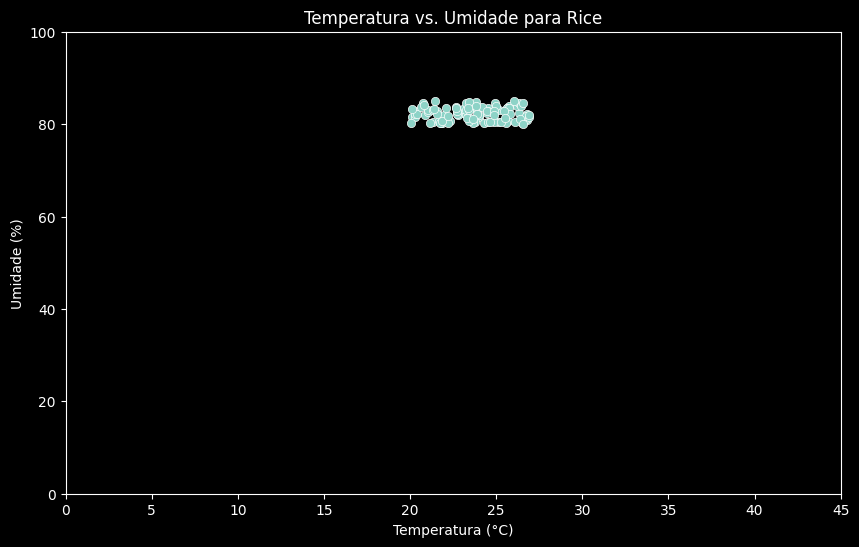

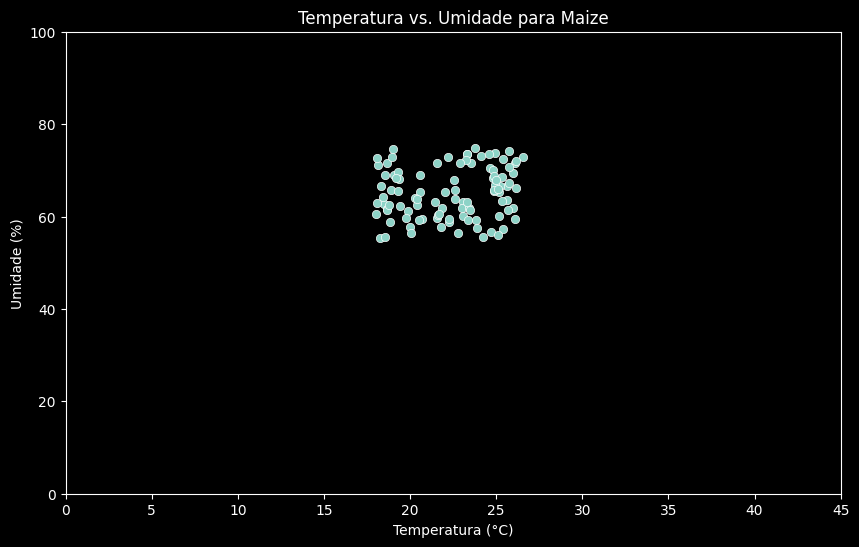

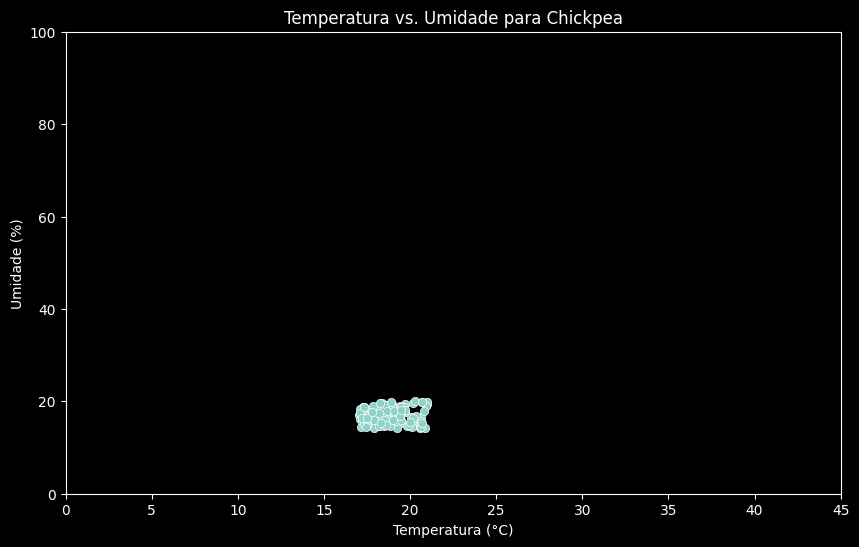

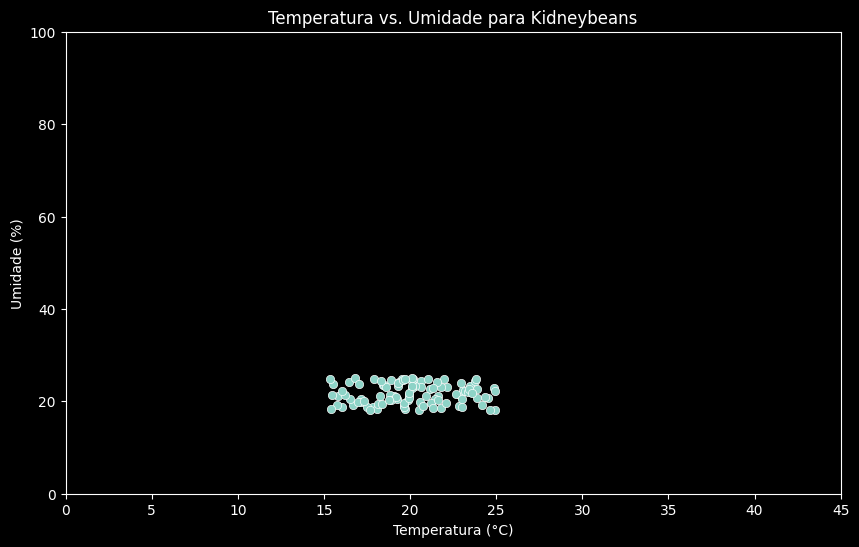

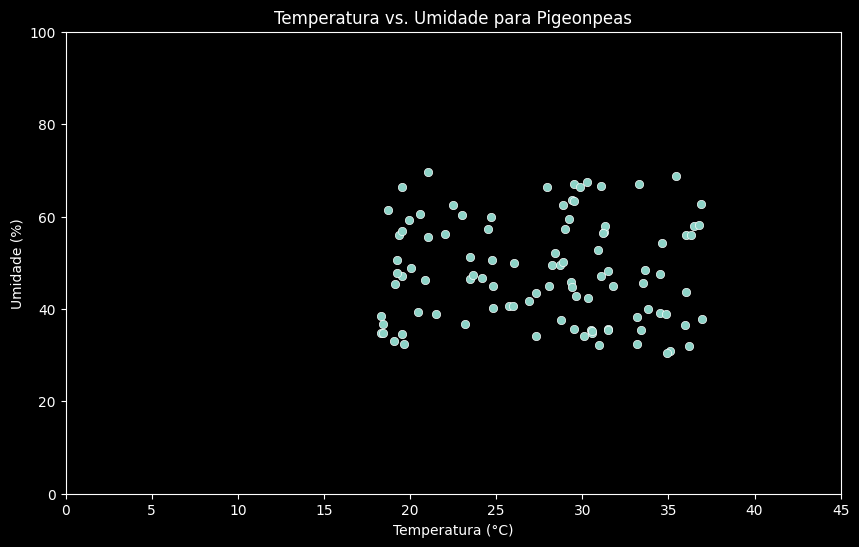

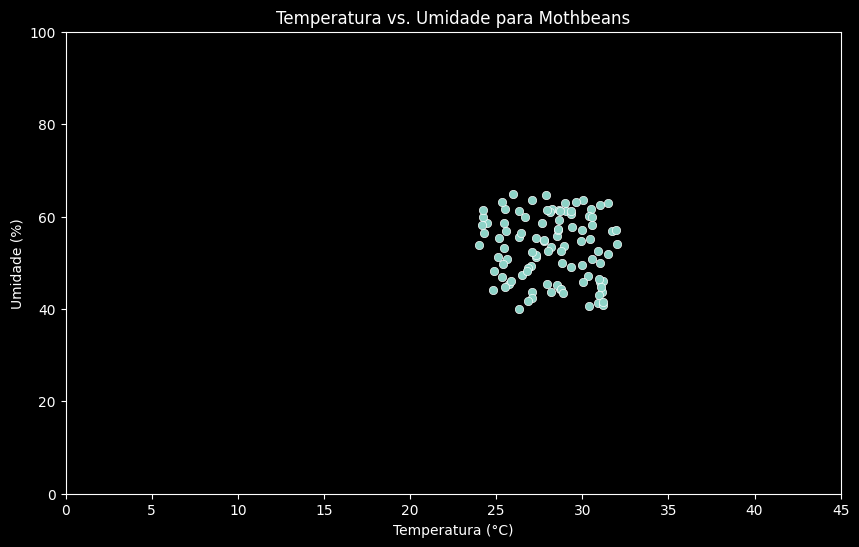

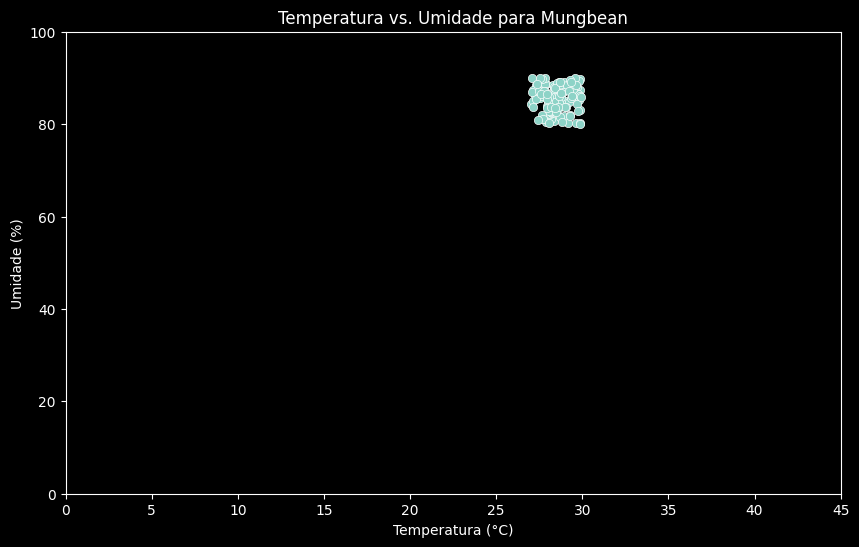

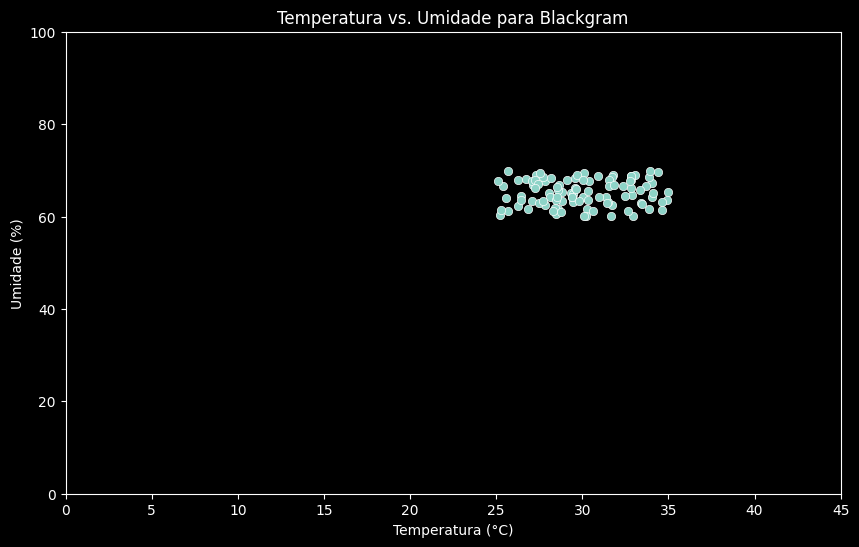

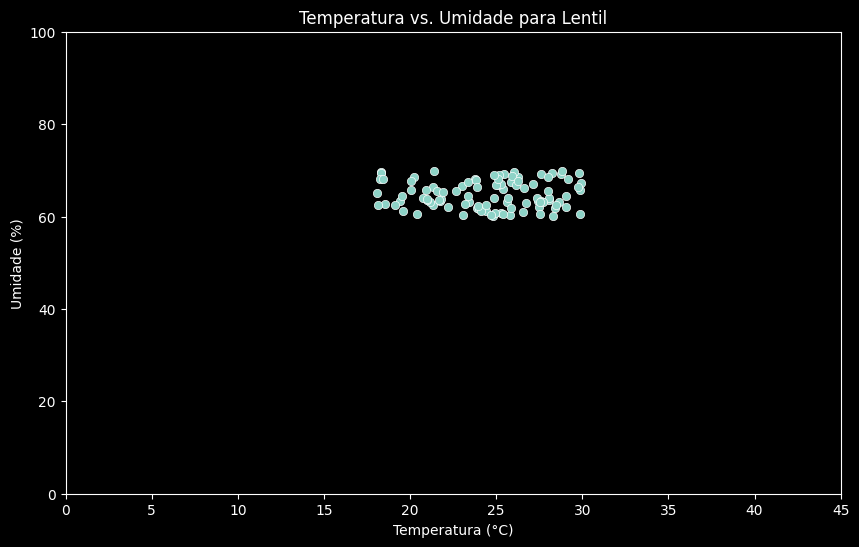

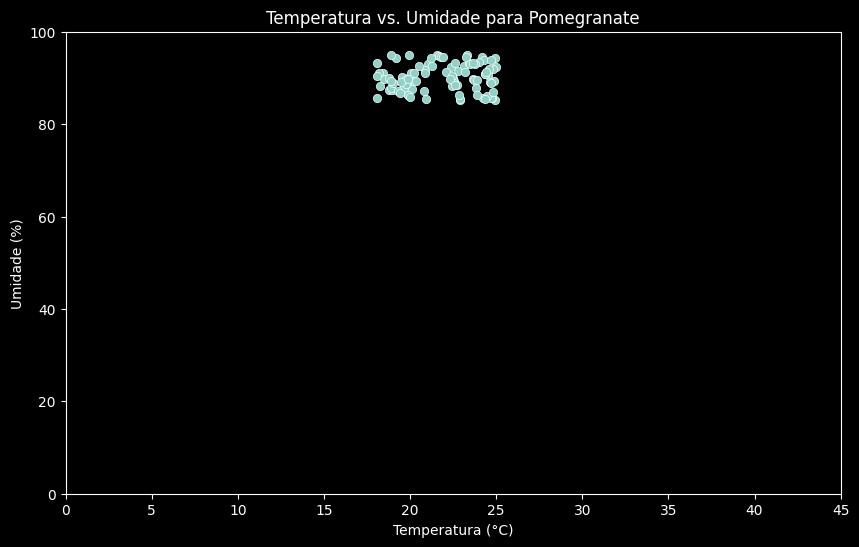

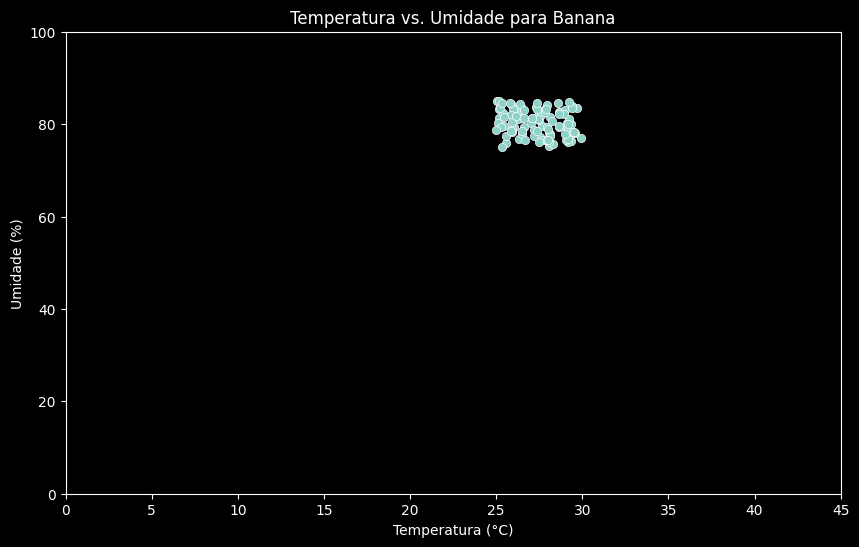

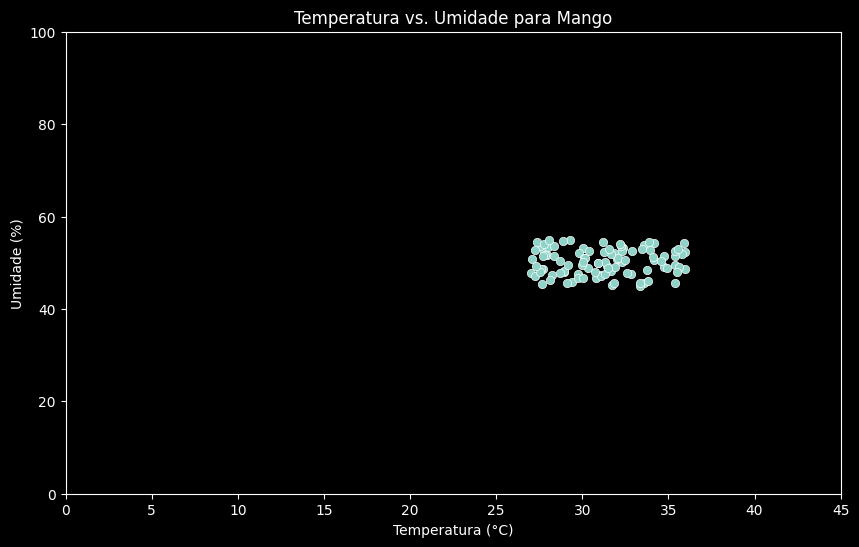

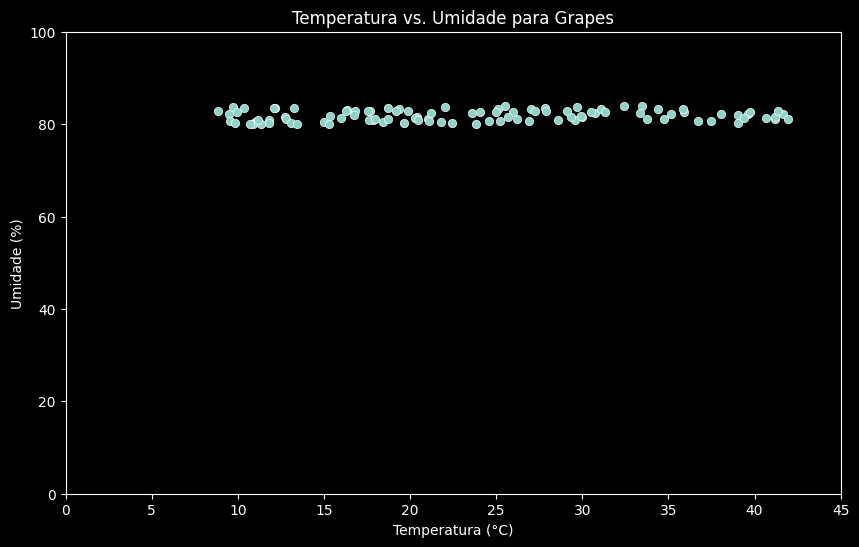

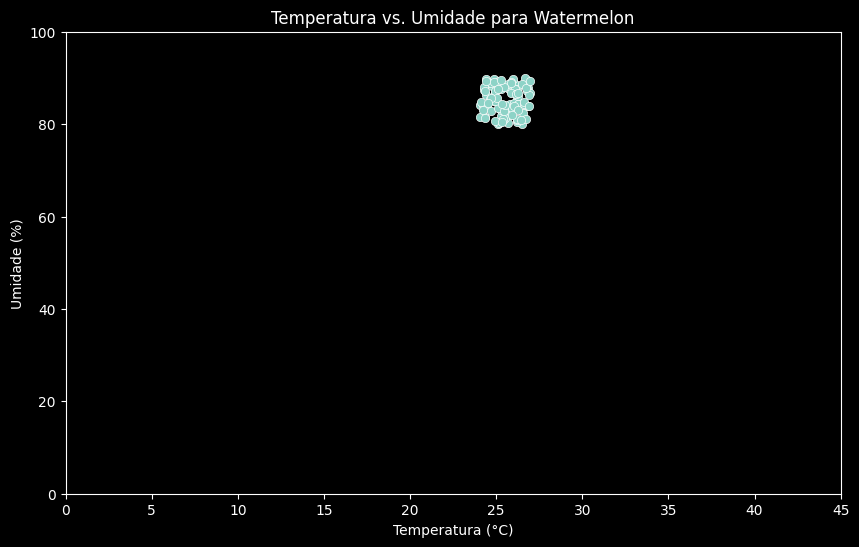

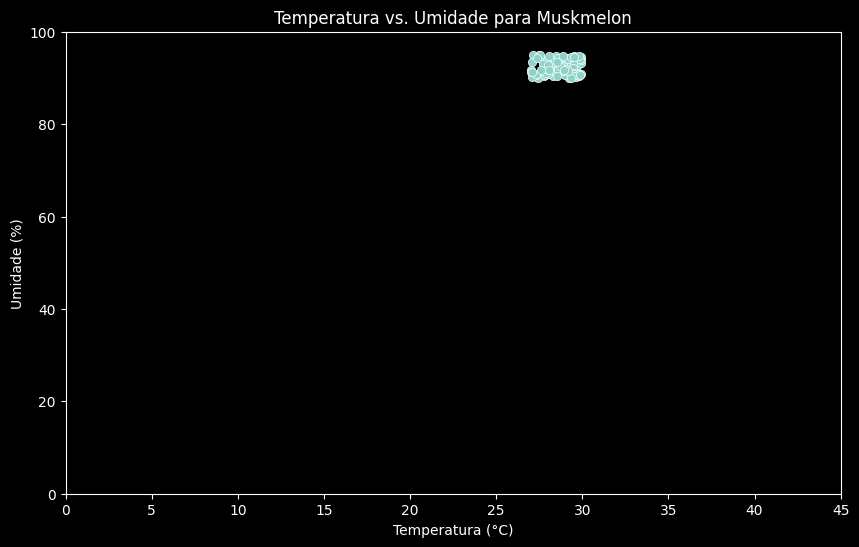

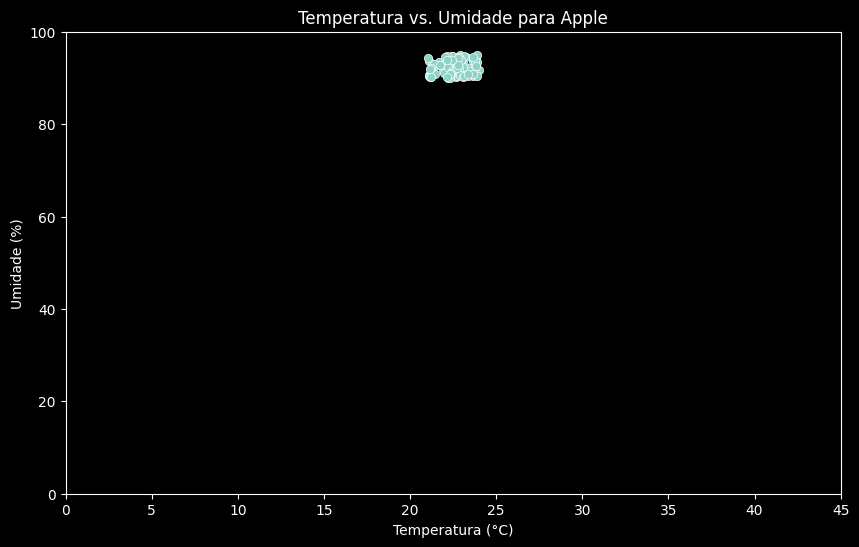

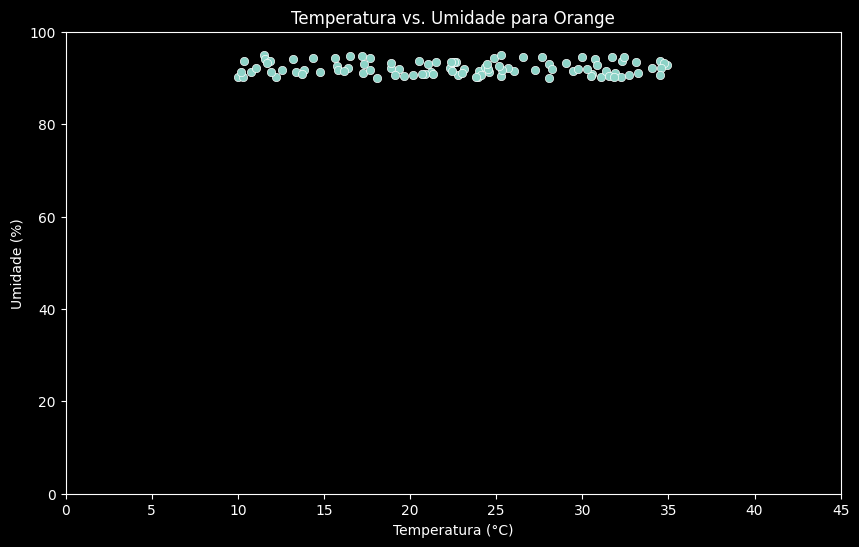

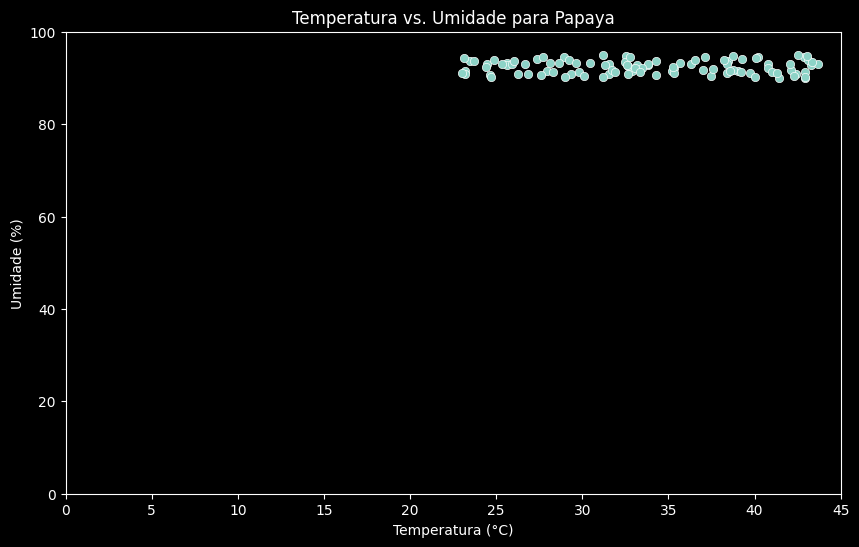

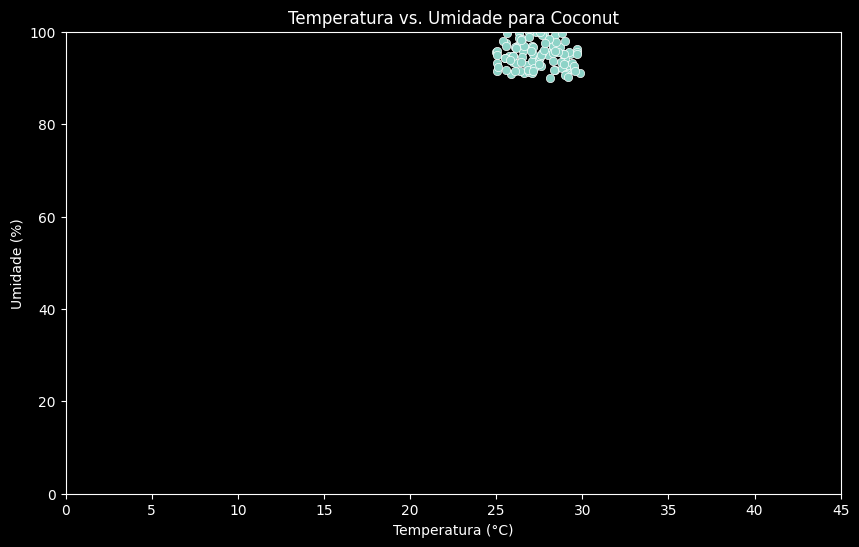

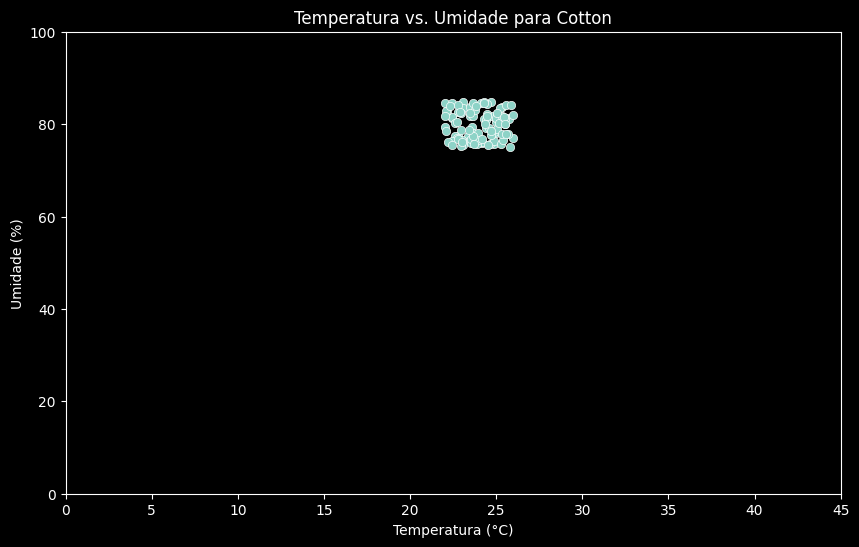

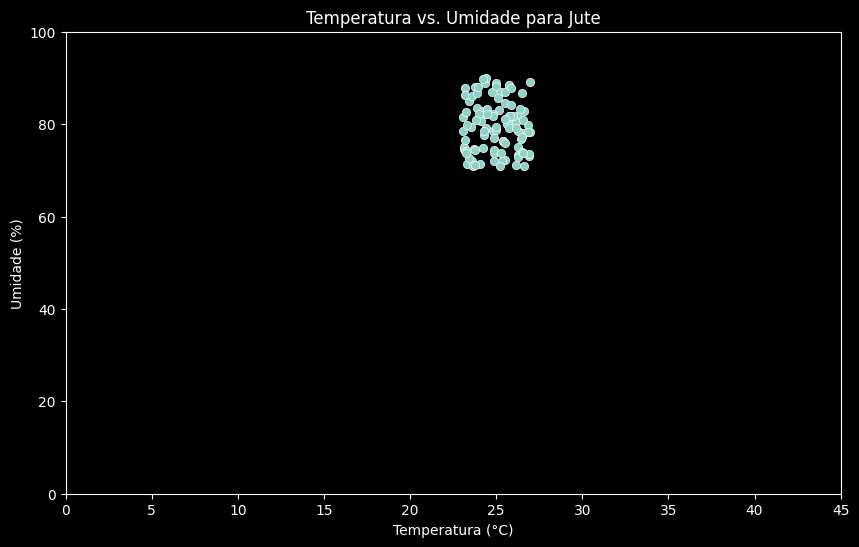

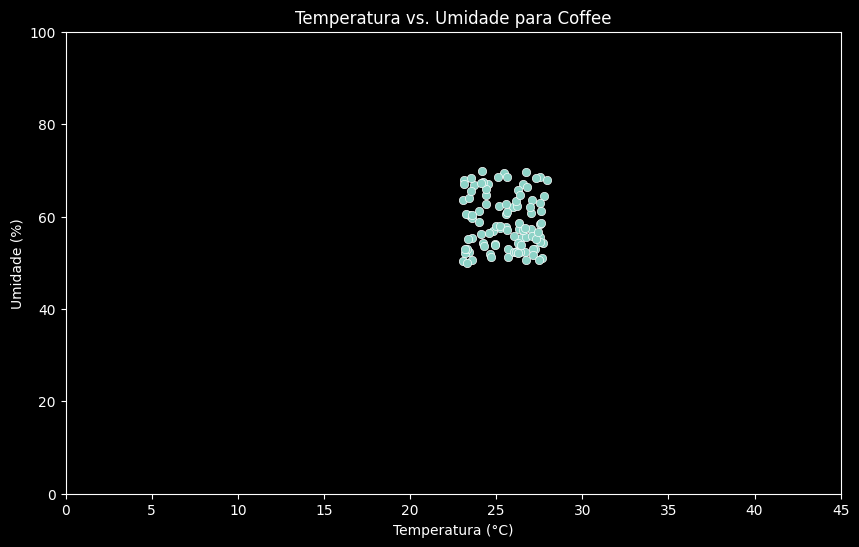

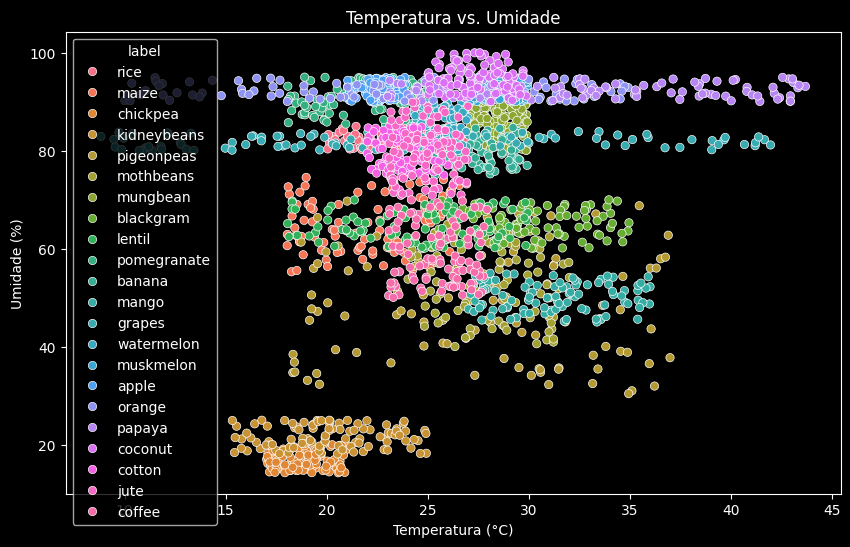

In [25]:
culturas = df['label'].unique()

# Definir limites fixos com base nos dados, adicionando uma margem
temp_min_fixed = 00  # Um pouco abaixo do mínimo
temp_max_fixed = 45  # Um pouco acima do máximo
hum_min_fixed = 0   # Um pouco abaixo do mínimo
hum_max_fixed = 100   # Um pouco acima do máximo

# Loop para criar um gráfico para cada cultura
for cultura in culturas:
    # Filtrar os dados para a cultura atual
    data_cultura = df[df['label'] == cultura]
    
    # Criar o gráfico de dispersão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='temperature', y='humidity', data=data_cultura)
    plt.title(f'Temperatura vs. Umidade para {cultura.capitalize()}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Umidade (%)')
    
    # Definir os limites dos eixos
    plt.xlim(temp_min_fixed, temp_max_fixed)
    plt.ylim(hum_min_fixed, hum_max_fixed)
    
    plt.show()

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', hue='label',data=df)
plt.title(f'Temperatura vs. Umidade')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')
plt.show()

### 2.6. Distribuição de valores de pH (empilhada) por cultura agrícola

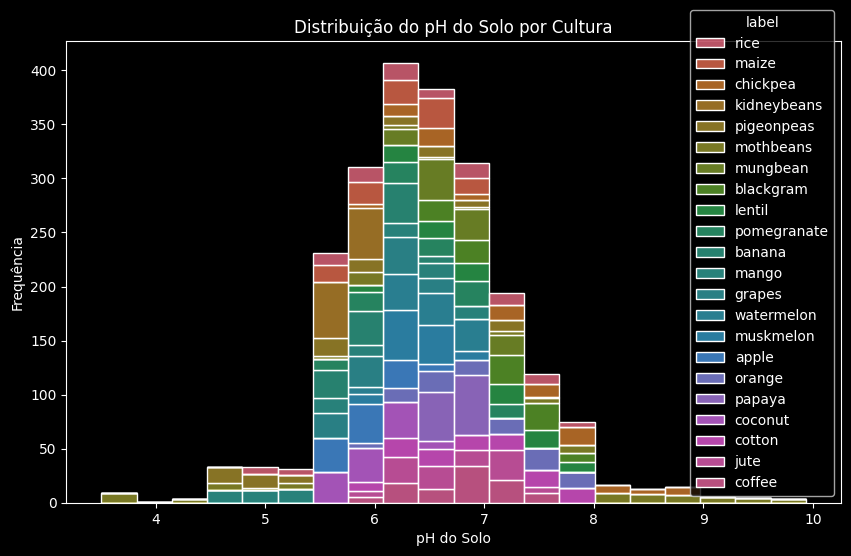

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ph', hue='label', multiple='stack', bins=20)
plt.title('Distribuição do pH do Solo por Cultura')
plt.xlabel('pH do Solo')
plt.ylabel('Frequência')
plt.show()

### 2.7. Gráficos de correlação bi-variadas para cada cultura agrícola

Objetivo:
- Avaliar a relação entre as variáveis para cada cultura agrícola

Obs.: vamos fazer apenas para a cultura agrícola 'coffee' (café) para demonstração.

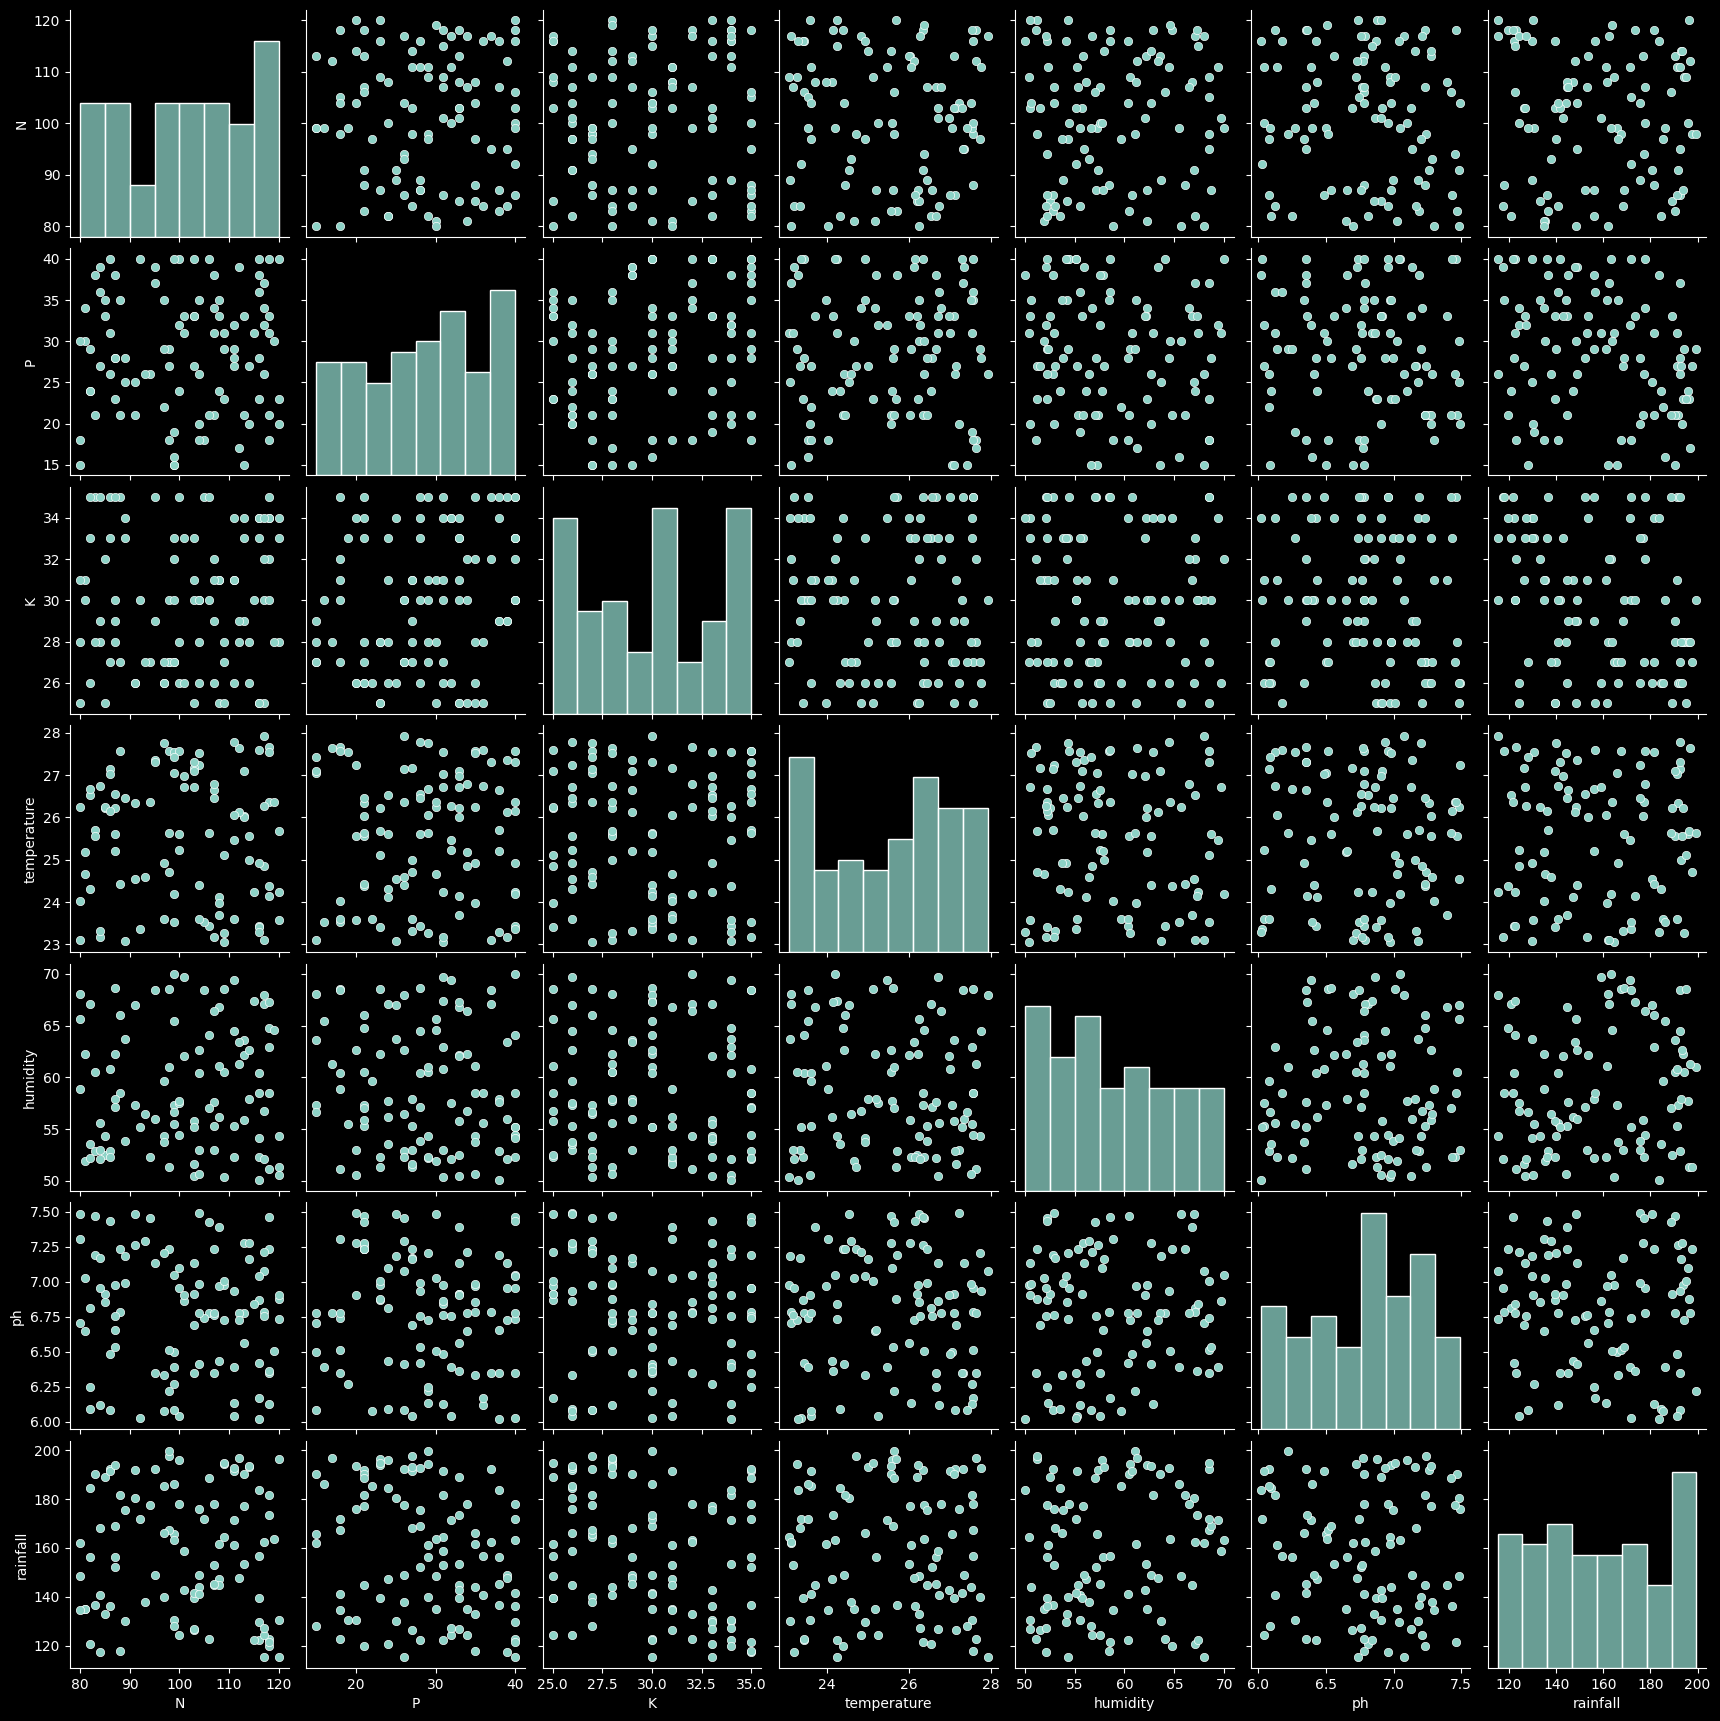

In [27]:
# Correlações bi-variadas para uma cultura específica
_ = sns.pairplot(df[df["label"] == "coffee"])

### 2.8. Gráficos de dispersão 3d de N, K e P para cada cultura agrícola

**Objetivo**: 
- Visualizar a relação entre as variáveis N, K e P para cada cultura agrícola
- Comparar a relação entre as variáveis para cada cultura agrícola

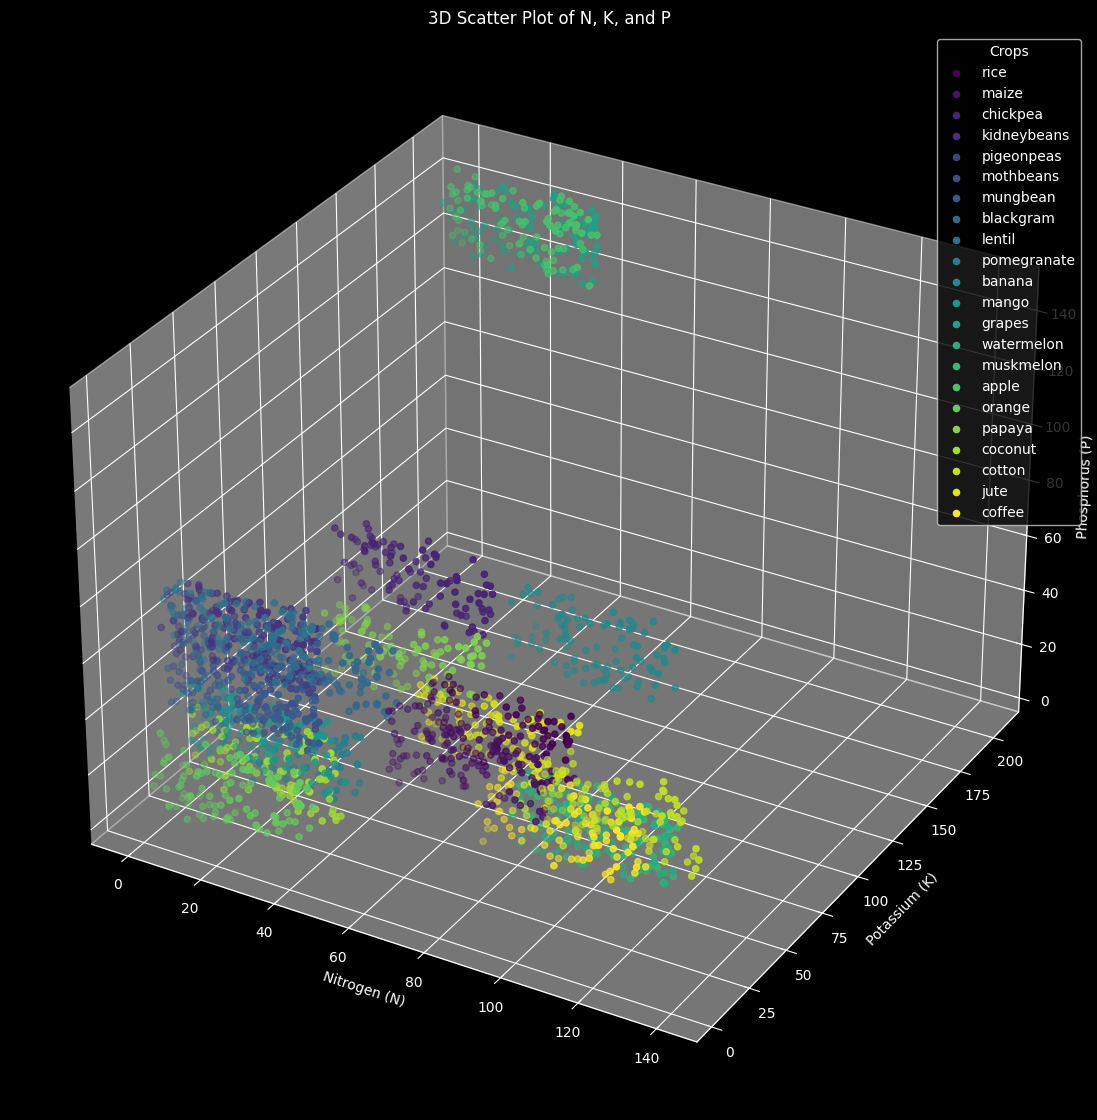

In [28]:
fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')

# Obter os labels únicos
labels = df['label'].unique()

# Criar um mapa de cores para os labels
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Scatter plot
for label, color in zip(labels, colors):
    subset = df[df['label'] == label]
    ax.scatter(subset['N'], subset['K'], subset['P'], label=label, color=color)

# Labels and title
ax.set_xlabel('Nitrogen (N)')
ax.set_ylabel('Potassium (K)')
ax.set_zlabel('Phosphorus (P)')
ax.set_title('3D Scatter Plot of N, K, and P')

# Add legend
ax.legend(title="Crops")

plt.show()


### 2.9 Principais achados da base

## 3. Perfil Ideal

## 4. Machine Learning

Sumário:
1. Pré-processamento de Dados: limpeza, transformação e feature engineering
2. Dividir dos Dados
3. Algoritmos
   1. Treinamento
   2. Avaliação
4. Concluir

### 4.1 Definição do Problema

Objetivos:
- Desenvolver modelos preditivos de classificação de cultura agrícola baseando-se nos dados

### 4.3 Pré-processamento de Dados

O pré-processamento de dados é essencial para garantir que o modelo de Machine Learning receba dados de alta qualidade. Ele abrange desde a limpeza e transformação dos dados até a criação de novas features, passando pela identificação e tratamento de outliers. Cada uma dessas etapas contribui para a melhoria da precisão e eficácia do modelo.


#### 4.3.1 Limpeza de Dados

Tratamento de dados ausentes, duplicados e inconsistências.

- Não aplicável, pois não há valores ausentes, duplicatas ou inconsistências.

#### 4.4.3 Feature Engineering

##### 4.4.3.1 Criação de Novas Features

- Não aplicável

##### 4.4.3.2 Transformação de Variáveis Categóricas

In [29]:
# Gerar label-encoding para a variável categórica 'label'
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

df_labels = df[['label', 'label_encoded']]
df_labels


,label,label_encoded
0,rice,20
1,rice,20
2,rice,20
3,rice,20
4,rice,20
...,...,...
2195,coffee,5
2196,coffee,5
2197,coffee,5
2198,coffee,5


In [30]:
df_features = df.drop(columns=['label', 'label_encoded'], errors='ignore')
df_features

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


#### 4.3.2 Divisão dos dados

In [31]:
# 20% dos dados para teste
df_features_train, df_features_test, df_labels_train, df_labels_test = train_test_split(df_features, df_labels, test_size=0.2, random_state=42)

print("Quantidade de linhas no dataset de treino: ", df_features_train.shape[0])
print("Quantidade de linhas no dataset de teste: ", df_features_test.shape[0])


Quantidade de linhas no dataset de treino:  1760
Quantidade de linhas no dataset de teste:  440


In [32]:
# Visualizar features
df_features_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725


In [33]:
# Visualizar labels
df_labels_train.head()

,label,label_encoded
1656,orange,16
752,blackgram,2
892,lentil,10
1041,banana,1
1179,mango,12


#### 4.3.3 Transformação de Dados

##### 4.3.3.1 Normalização

Isso é útil para algoritmos sensíveis à escala, como redes neurais.

A normalização dos dados pode melhorar o desempenho de alguns algoritmos de aprendizado de máquina categóricos, mas não de todos. Aqui está uma análise de como a normalização afeta cada um dos algoritmos:

Algoritmos afetados pela normalização:

- **KNN (k-Nearest Neighbors)**: KNN usa a distância euclidiana para calcular a similaridade entre os pontos de dados. Quando as variáveis ​​têm escalas diferentes, as variáveis ​​com valores maiores podem ter um impacto desproporcional na distância. A normalização garante que todas as variáveis ​​tenham o mesmo peso na medida da distância, o que pode melhorar a precisão do KNN.
- **Regressão Logística**: A regressão logística usa a função sigmóide, que é sensível à escala das variáveis ​​de entrada. Se algumas variáveis ​​tiverem valores muito maiores do que outras, elas podem dominar a função sigmóide, levando a uma convergência lenta ou mesmo a um desempenho ruim. A normalização pode ajudar a resolver esse problema, garantindo que todas as variáveis ​​tenham uma escala semelhante.
- **SVM (Máquina de Vetores de Suporte)**: SVM também usa a distância euclidiana para encontrar o hiperplano ótimo. Da mesma forma com o KNN, variáveis ​​com escalas diferentes podem influenciar a distância de forma desigual. A normalização pode ajudar a melhorar o desempenho do SVM, especialmente em conjuntos de dados com características de diferentes escalas.

Algoritmos menos afetados pela normalização:

- **Árvores de Decisão**: Árvores de decisão são menos sensíveis à escala dos dados, pois a divisão de nós é baseada na seleção da melhor variável e ponto de corte, independentemente de sua escala.
- **Florestas Aleatórias**: Como as árvores de decisão, as florestas aleatórias são relativamente insensíveis à normalização, pois são compostas por várias árvores de decisão, que são treinadas em diferentes subconjuntos de dados.

In [34]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features data
scaler.fit(df_features_train)

# Transform the features train data
scaled_train = scaler.transform(df_features_train)
# Convert the scaled data back to a DataFrame
df_scaled_train = pd.DataFrame(scaled_train, columns=df_features.columns)

# Transform the features test data
scaled_test = scaler.transform(df_features_test)
# Convert the scaled data back to a DataFrame
df_scaled_test = pd.DataFrame(scaled_test, columns=df_features.columns)

# Display the first few rows of the scaled data
df_scaled_train

,N,P,K,temperature,humidity,ph,rainfall
0,0.121429,0.078571,0.045,0.217234,0.908990,0.485322,0.296852
1,0.264286,0.528571,0.070,0.537110,0.642579,0.565941,0.176308
2,0.050000,0.485714,0.100,0.536479,0.570058,0.588352,0.089318
3,0.721429,0.464286,0.215,0.474462,0.708898,0.390017,0.345770
4,0.000000,0.085714,0.125,0.764684,0.393181,0.431452,0.278327
...,...,...,...,...,...,...,...
1755,0.071429,0.000000,0.000,0.355451,0.899329,0.670741,0.332938
1756,0.771429,0.635714,0.210,0.531809,0.819906,0.448294,0.253244
1757,0.078571,0.221429,0.130,0.547921,0.437603,0.461981,0.287198
1758,0.078571,0.850000,0.995,0.132116,0.767637,0.444205,0.183467


##### 4.3.3.2 Padronização

Importante para algoritmos sensíveis à escala.

Aplicável?

### 4.4. Treinamento de modelos

#### 4.4.1. Árvore de Decisão

Uma técnica de aprendizado supervisionado que cria uma estrutura hierárquica para classificação e regressão, baseada em decisões sequenciais.

**Funcionamento:**
- **Seleção da melhor divisão**: Identifica a variável que melhor divide os dados em subconjuntos homogêneos
- **Divisão recursiva**: Divide os dados em subconjuntos, formando novos nós
- **Classificação**: Classifica novos exemplos percorrendo a árvore da raiz até as folhas

**Vantagens:**
- Fácil interpretação
- Flexibilidade para diferentes tipos de dados
- Lida bem com variáveis numéricas e categóricas

**Desvantagens:**
- Tendência a overfitting
- Instabilidade com pequenas variações nos dados
- Viés para variáveis com mais categorias

In [35]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

# Prever as classes para o conjunto de teste
dt_pred = dt.predict(df_scaled_test)

# Calcular a acurácia
accuracy = accuracy_score(df_labels_test['label_encoded'], dt_pred)
print(f'Acurácia do modelo Decision Tree: {accuracy:.2f}')

# Gerar um relatório de classificação
# print(classification_report(df_test_label, dt_pred))

Acurácia do modelo Decision Tree: 0.97


#### 4.4.2. Floresta Aleatória

Uma evolução da árvore de decisão que combina múltiplas árvores para melhorar a capacidade preditiva.

**Funcionamento:**
- **Criação de múltiplas árvores**: Treina várias árvores com subconjuntos aleatórios dos dados
- **Agregação**: Combina as previsões de todas as árvores por votação ou média

**Vantagens:**
- Alta precisão
- Robustez contra overfitting
- Boa performance com dados de alta dimensionalidade

**Desvantagens:**
- Menor interpretabilidade
- Alto custo computacional

In [36]:
rf = RandomForestClassifier(n_estimators=25, max_depth=10)
rf.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

rf_pred = rf.predict(df_scaled_test)

# Calcular a acurácia
accuracy = accuracy_score(df_labels_test['label_encoded'], rf_pred)

print("Acurácia do modelo Random Forest: ", accuracy)
# print(classification_report(df_test_label, rf_pred))


Acurácia do modelo Random Forest:  0.990909090909091


#### 4.4.3. Regressão Logística

Algoritmo de aprendizado supervisionado que pode ser adaptado para classificação multiclasse através da abordagem "one-vs-all" ou "one-vs-one".

**Funcionamento:**
- **Combinação linear**: Combina características com seus pesos para cada classe
- **Função logística**: Aplica função softmax para obter probabilidades para todas as classes
- **Classificação**: Atribui o exemplo à classe com maior probabilidade prevista

**Vantagens:**
- Alta interpretabilidade das probabilidades por classe
- Eficiente para grandes datasets
- Robusta com regularização
- Fornece probabilidades bem calibradas
- Fácil de atualizar com novos dados

**Desvantagens:**
- Performance pode ser inferior a outros métodos em relações não-lineares complexas
- Sensível à multicolinearidade entre variáveis preditoras
- Pode requerer mais recursos computacionais conforme aumenta o número de classes
- Necessita de uma quantidade significativa de dados por classe
- Assume independência entre as classes

In [37]:
lr = LogisticRegression(max_iter=1000)
lr.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

lr_pred = lr.predict(df_scaled_test)

print("Acurácia do modelo Logistic Regression: ", accuracy_score(df_labels_test['label_encoded'], lr_pred))
# print(classification_report(df_test_label, lr_pred))


Acurácia do modelo Logistic Regression:  0.9181818181818182


#### 4.4.4 K-Nearest Neighbors (KNN)

Algoritmo baseado na proximidade entre pontos para classificação.

**Funcionamento:**
- **Cálculo de distância**: Mede a distância entre o novo ponto e todos os pontos existentes
- **Seleção de vizinhos**: Identifica os K vizinhos mais próximos
- **Votação**: Classifica baseado na maioria dos vizinhos

**Vantagens:**
- Simples de implementar
- Não requer treinamento
- Adaptável a novos dados

**Desvantagens:**
- Computacionalmente intensivo para grandes datasets
- Sensível à escolha do valor K
- Requer normalização dos dados


In [38]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

knn_pred = knn.predict(df_scaled_test)

print("Acurácia do modelo KNN: ", accuracy_score(df_labels_test['label_encoded'], knn_pred))
# print(classification_report(df_test_label, knn_pred))


Acurácia do modelo KNN:  0.9590909090909091


#### 4.4.5 Support Vector Machine (SVM)

Algoritmo que busca o melhor hiperplano de separação entre classes.

**Funcionamento:**
- **Mapeamento dimensional**: Transforma dados para dimensões superiores
- **Otimização**: Encontra o hiperplano com maior margem entre classes
- **Classificação**: Determina classes pela posição relativa ao hiperplano

**Vantagens:**
- Eficaz em alta dimensionalidade
- Robusto a outliers
- Versátil com diferentes kernels

**Desvantagens:**
- Complexidade na escolha de parâmetros
- Alto custo computacional para grandes datasets

In [39]:
svm = SVC()
svm.fit(df_scaled_train, df_labels_train['label_encoded'].values.ravel())

svm_pred = svm.predict(df_scaled_test)

print("Acurácia do modelo SVM: ", accuracy_score(df_labels_test['label_encoded'], svm_pred))
# print(classification_report(df_test_label, svm_pred))


Acurácia do modelo SVM:  0.9681818181818181


### 4.5. Evaluating Models

In [40]:
df_labels_test

,label,label_encoded
1451,muskmelon,15
1334,watermelon,21
1761,papaya,17
1735,papaya,17
1576,apple,0
...,...,...
59,rice,20
71,rice,20
1908,cotton,6
1958,cotton,6


In [41]:
def evaluate_model(model, model_name):
    print("Evaluating model: ", model_name)
    # Cross-validation metrics
    cv_scores = cross_val_score(
        model, df_scaled_train, df_labels_train["label_encoded"], cv=5
    )
    print(
        f"\nCross-validated accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}"
    )

    # Test set accuracy
    predictions = model.predict(df_scaled_test)
    
    accuracy = accuracy_score(df_labels_test["label_encoded"], predictions)
    precision = precision_score(df_labels_test["label_encoded"], predictions, average='weighted')
    recall = recall_score(df_labels_test["label_encoded"], predictions, average='weighted')
    f1 = f1_score(df_labels_test["label_encoded"], predictions, average='weighted')
    
    print(f"\nTest set accuracy: {accuracy:.2f}")
    print(f"Test set precision: {precision:.2f}")
    print(f"Test set recall: {recall:.2f}")
    print(f"Test set F1 score: {f1:.2f}")
    
    print("\nClassification report")
    print(
        classification_report(
            df_labels_test["label_encoded"],
            predictions,
            target_names=le.inverse_transform(
                np.unique(df_labels_test["label_encoded"])
            ),
        )
    )


In [42]:
evaluate_model(dt, 'Decision Tree')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
predicted_label = dt.predict(new_sample)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')


Evaluating model:  Decision Tree

Cross-validated accuracy: 0.95 ± 0.03

Test set accuracy: 0.97
Test set precision: 0.97
Test set recall: 0.97
Test set F1 score: 0.97

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.90      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.91      0.83      0.87        2

In [43]:
evaluate_model(rf, 'Random Forest')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
new_sample_scaled = scaler.transform(new_sample)  # Scale the new sample
predicted_label = rf.predict(new_sample_scaled)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')


Evaluating model:  Random Forest

Cross-validated accuracy: 0.99 ± 0.01

Test set accuracy: 0.99
Test set precision: 0.99
Test set recall: 0.99
Test set F1 score: 0.99

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        2

In [44]:
evaluate_model(lr, 'Logistic Regression')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
new_sample_scaled = scaler.transform(new_sample)  # Scale the new sample
predicted_label = lr.predict(new_sample_scaled)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')

Evaluating model:  Logistic Regression

Cross-validated accuracy: 0.93 ± 0.01

Test set accuracy: 0.92
Test set precision: 0.93
Test set recall: 0.92
Test set F1 score: 0.92

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.89      0.85      0.87        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.84      0.70      0.76        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.95      0.98        21
       mango       0.66      1.00      0.79        19
   mothbeans       1.00      0.54      0.70   

In [45]:
evaluate_model(knn, 'K-Nearest Neighbors')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
new_sample_scaled = scaler.transform(new_sample)  # Scale the new sample
predicted_label = knn.predict(new_sample_scaled)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')

Evaluating model:  K-Nearest Neighbors

Cross-validated accuracy: 0.98 ± 0.00

Test set accuracy: 0.96
Test set precision: 0.96
Test set recall: 0.96
Test set F1 score: 0.96

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.90      0.95        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.83      0.91   

In [46]:
evaluate_model(svm, 'Support Vector Machine')

# Example of making a prediction for a new sample
new_sample = [[85, 40, 42, 21.0, 80.0, 6.4, 200.0]]  # Example input
new_sample_scaled = scaler.transform(new_sample)  # Scale the new sample
predicted_label = svm.predict(new_sample_scaled)
print(f'Predicted label: {le.inverse_transform(predicted_label)[0]}')


Evaluating model:  Support Vector Machine

Cross-validated accuracy: 0.98 ± 0.01

Test set accuracy: 0.97
Test set precision: 0.97
Test set recall: 0.97
Test set F1 score: 0.97

Classification report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93